<a href="https://colab.research.google.com/github/jovaceos/analisis_explortorio_datos/blob/main/EDA_Trabajo_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tabla de contenido**


I.

1) Contexto

2) Pregunta SMART

3) Diccionario de datos

4) Objetivo del análisis

II.

5) Análisis exploratorio

5.1) Análisis de estructura

5.2) Definición de variables a trabajar

5.3) Análisis de variables categóricas

III.

6) Preparación de los datos

In [6]:
import math

import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression #modelamiento
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

**I**

**1) Contexto**

El modelo de medición de grupos de investigación e investigadores, tienen como propósito "*que el conocimiento generado a partir de la investigación y el desarrollo tecnológico nacional tenga un mayor impacto sobre el sistema productivo y contribuya a la solución de las problemáticas de la sociedad colombiana*". A nivel institucional, permite
generar conocimiento sobre las capacidades, fortalezas, debilidades y potencialidades de los grupos y que sirva como un instrumento para la gestión interna y para la evaluación de quienes integran el Sistema Nacional de Ciencia, Tecnología e Innovación. En relación a la tipología de productos (producción de nuevo conocimiento; productos de desarrollo tecnológico e innovación; productos de apropiación social del conocimiento y divulgación pública de la ciencia y productos de actividades relacionadas a la formación de recurso humano)

**2) Pregunta SMART**

¿Cuáles son los valores mínimos de indicadores (grupo, producción de nuevo conocimiento, desarrollo tecnológico e innovación; apropación social de conocimiento y divulgación pública de la ciencia y productos relacionados a la formación de recurso humano) que debe de cumplir un grupo de investigación para mejorar su clasificación en una próxima medición de grupos de investigación?

**Específica**: Valores mínimos que debe de cumplir un grupo de investigación para mejorar la clasificación.

**Medible**: Cantidad de productos, según tipología, que debe de cumplir el grupo de investigación para mejorar la clasificación.

**Accionable**: Identificación de productos específicos que debe de tener el grupo de investigación para mejorar la clasificación.

**Relevante**: Permite generar conocimiento sobre las capacidades, fortalezas, debilidades y potencialidades de los grupos y que sirva como un instrumento para la gestión interna y para la evaluación.

**Tiempo definido**: Próxima medición de grupos de investigación.

**3) Diccionario de datos**

Para dar respuesta a la anterior pregunta, se hará uso de dos (2) fuentes de información:

La primera, denominada, **Grupos de investigación reconocidos**, que contiene la siguiente información:

*   ID_CONVOCATORIA. Identificador de reconocimiento convocatoria. Número
*   NME_CONVOCATORIA. Nombre de convocatoria reconocimiento. Texto simple
*   ANO_CONVO. Año de inicio vigencia de convocatoria. Fecha y hora
*   COD_GRUPO_GR. Código del grupo de investigación. Texto simple
*   NME_GRUPO_GR. Nombre del grupo de investigación. Texto simple
*   FCREACION_GR	. Fecha de creación del grupo. Fecha y hora
*   NME_MUNICIPIO_GR. Nombre del municipio del grupo. Texto simple

La segunda, denominada, **Producción de grupos de investigación**, que contiene la siguiente información:

*   ID_CONVOCATORIA. Identificador de la convocatoria. Texto simple
*   NME_CONVOCATORIA. Nombre de convocatoria reconocimiento. Texto simple
*   ANO_CONVO. Año de realización de la convocatoria. Fecha y hora
*   ID_PRODUCTO_PD. Identificador único del producto. Texto simple
*   NME_CLASE_PD. Nombre de la clase de producto al que pertenece el producto. Texto simple
*   NME_TIPO_MEDICION_PD. Nombre de tipo de producto al que pertenece el producto. Texto simple
*   NME_TIPOLOGIA_PD. Nombre de la tipología obtenida del producto. Texto simple


**4) Objetivo del análisis**

Identificar los valores mínimos de indicadores (grupo, producción de nuevo conocimiento, desarrollo tecnológico e innovación; apropación social de conocimiento y divulgación pública de la ciencia y productos relacionados a la formación de recurso humano) así como la cantidad de productos mínimos que debe de cumplir un grupo de investigación para mejorar su clasificación en una próxima medición de grupos de investigación

**II**

**5)** **Análisis exploratorio**

Se procedera revisar las dos (2) fuentes de información a utilizar para dar respuesta a la pregunta SMART y así cumplir el objetivo establecido.

Primero, se procederá a cargar la información correspondiente a la **clasificación** de los grupos de investigación, según las convocatorias de Minciencas para el período 2013-2021

**5.1)** **Análisis de estructura**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
Clasificacion_grupos=pd.read_csv('/content/drive/MyDrive/EDA_Trabajo_Final/Grupos_Investigacion_Reconocidos.csv', sep=',')
Clasificacion_grupos.shape

(30051, 21)

La información consignada en el dataframe de clasificación de grupos cuenta con 21 columnas y 30051 filas. Sin embargo, cuando se pretende acceder a la información del conjunto de datos desde la url, se aprecia que la información, no viene completa, solo trae una parte de la información

In [9]:
clasificacion=pd.read_csv('https://www.datos.gov.co/resource/hrhc-c4wu.csv', sep=',')
clasificacion.shape

(1000, 21)

In [10]:
Clasificacion_grupos.head()

,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,COD_GRUPO_GR,NME_GRUPO_GR,FCREACION_GR,NME_MUNICIPIO_GR,NME_DEPARTAMENTO_GR,NME_REGION_GR,NME_PAIS_GR,...,ID_AREA_CON_GR,NME_AREA_ESP_GR,NME_AREA_GR,NME_GRAN_AREA_GR,NME_CLASIFICACION_GR,ORDEN_CLAS_GR,EDAD_ANOS_GR,INST_AVAL,NME_PROG_COLC1_GR,NME_PROG_COLC2_GR
0,16,Convocatoria 640 de 2013,31/10/2013,COL0016283,Socialización y violencia,01/02/1993,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,5I,No registra,Otras Ciencias Sociales,Ciencias Sociales,C,2,21.00,UNIVERSIDAD CENTRAL,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e Innovación en Educación"
1,16,Convocatoria 640 de 2013,31/10/2013,COL0018751,ECITRONICA,01/01/2002,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,2B,No registra,"Ingenierías Eléctrica, Electrónica e Informática",Ingeniería y Tecnología,C,2,12.08,ESCUELA COLOMBIANA DE INGENIERIA JULIO GARAVITO,"Ciencia, Tecnología e Innovación en Tecnología...",Desarrollo Tecnológico e Innovación Industrial
2,16,Convocatoria 640 de 2013,31/10/2013,COL0013334,Línea de Investigación en Jóvenes y Culturas J...,01/06/1995,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,5D,No registra,Sociología,Ciencias Sociales,D,1,18.67,UNIVERSIDAD CENTRAL,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e Innovación en Educación"
3,16,Convocatoria 640 de 2013,31/10/2013,COL0013316,Género y Cultura,01/09/1998,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,5I,No registra,Otras Ciencias Sociales,Ciencias Sociales,C,2,15.42,UNIVERSIDAD CENTRAL,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e Innovación en Educación"
4,16,Convocatoria 640 de 2013,31/10/2013,COL0014583,Pavimentos y Materiales de Ingeniería,01/12/2002,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,2A,No registra,Ingeniería Civil,Ingeniería y Tecnología,D,1,11.17,UNIVERSIDAD CATOLICA DE COLOMBIA,"Ciencia, Tecnología e innovación en Ambiente, ...",Desarrollo Tecnológico e Innovación Industrial


In [11]:
Clasificacion_grupos.tail()

,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,COD_GRUPO_GR,NME_GRUPO_GR,FCREACION_GR,NME_MUNICIPIO_GR,NME_DEPARTAMENTO_GR,NME_REGION_GR,NME_PAIS_GR,...,ID_AREA_CON_GR,NME_AREA_ESP_GR,NME_AREA_GR,NME_GRAN_AREA_GR,NME_CLASIFICACION_GR,ORDEN_CLAS_GR,EDAD_ANOS_GR,INST_AVAL,NME_PROG_COLC1_GR,NME_PROG_COLC2_GR
30046,21,Convocatoria 894 de 2021,25/02/2021,COL0224491,ENSUP,01/01/2016,Pasto,Nariño,Pacífico,Colombia,...,5C,No registra,Ciencias de la Educación,Ciencias Sociales,C,2,4.91,IEM ESCUELA NORMAL SUPERIOR DE PASTO,"Ciencia, Tecnología e Innovación en Ciencias H...",No Aplica
30047,21,Convocatoria 894 de 2021,25/02/2021,COL0224571,EMPRENDIMIENTO Y NEGOCIOS,01/01/2019,No disponible,No disponible,No disponible,No disponible,...,5B,No registra,Economía y Negocios,Ciencias Sociales,C,2,1.91,CORPORACION INNPRENDE,No Aplica,No Aplica
30048,21,Convocatoria 894 de 2021,25/02/2021,COL0224615,ANGIOINV,01/12/2019,Villavicencio,Meta,Llano,Colombia,...,3B12,"Radiología, Medicina Nuclear y de Imágenes",Medicina Clínica,Ciencias Médicas y de la Salud,Reconocido,0,1.00,ANGIORIENTE SAS,"Ciencia, Tecnología e Innovación en Salud",Biotecnología
30049,21,Convocatoria 894 de 2021,25/02/2021,COL0224642,HPOResearch,01/01/2019,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,2K02,Otras Ingenierías y Tecnologías,Otras Ingenierías y Tecnologías,Ingeniería y Tecnología,Reconocido,0,1.91,HPO GLOBAL RESOURCES VENTURES INC SUCURSAL COL...,Investigaciones en Energía y Minería,"Ciencia, Tecnología e Innovación en Geociencias"
30050,21,Convocatoria 894 de 2021,25/02/2021,COL0224713,Hematología y Oncología,01/01/2019,No disponible,No disponible,No disponible,No disponible,...,3B06,Hematología,Medicina Clínica,Ciencias Médicas y de la Salud,C,2,1.91,PROGRAMA PARA EL TRATAMIENTO Y ESTUDIO DE ENFE...,"Ciencia, Tecnología e Innovación en Salud",Biotecnología


Tanto con el head como con el tail, se pueden observar tanto la muestra inicial como la final del conjunto de datos. Observándose, que aunque haya datos en las columnas, estos aparecen como No disponible o No registra en algunas columnas; teniendo en cuenta lo anterior, se procederá a revisar la información en dichas columnas.

E primer lugar, se procederá a revisar la cantidad de datos únicos que cuenta dicha columna y con base en ello, en segundo lugar se procederá a revisar el conteo de los registros de dicha columna. Esto se realizará para las columnas mencionadas NME_AREA_ESP_GR y NME_DEPARTAMENTO_GR

In [12]:
Clasificacion_grupos ['NME_AREA_ESP_GR'].value_counts()

No registra                                                                                 23266
Educación General (Incluye Capacitación, Pedagogía)                                           464
Negocios y Management                                                                         427
Otras Ingenierías y Tecnologías                                                               301
Ciencias Sociales, Interdisciplinaria                                                         297
                                                                                            ...  
Ingeniería del Audio                                                                            1
Planificación del Transporte y Aspectos Sociales del Transporte                                 1
Teoría Organizacional                                                                           1
Tecnología Médica de Laboratorio (Análisis de Muestras, Tecnologías para el Diagnóstico)        1
Textiles            

In [13]:
Clasificacion_grupos['NME_DEPARTAMENTO_GR'].nunique()

33

In [14]:
Clasificacion_grupos['NME_DEPARTAMENTO_GR'].unique()

array(['Bogotá, D. C.', 'Boyacá', 'Santander', 'Córdoba', 'Antioquia',
       'Valle del Cauca', 'La Guajira', 'Atlántico', 'Cauca',
       'Cundinamarca', 'Risaralda', 'Nariño', 'Magdalena', 'Caquetá',
       'Caldas', 'Huila', 'Bolívar', 'Quindío', 'Tolima',
       'Norte de Santander', 'Sucre', 'Meta', 'Cesar', 'Amazonas',
       'Guaviare', 'Chocó',
       'Archipiélago de San Andrés, Providencia y Santa Catalina',
       'Casanare', 'Arauca', 'Vaupés', 'No disponible', 'Vichada',
       'Putumayo'], dtype=object)

In [15]:
Clasificacion_grupos ['NME_DEPARTAMENTO_GR'].value_counts()

Bogotá, D. C.                                               10369
Antioquia                                                    4433
Valle del Cauca                                              2427
Santander                                                    1501
Atlántico                                                    1432
Bolívar                                                      1042
Boyacá                                                        950
Caldas                                                        871
Risaralda                                                     796
Cundinamarca                                                  644
Norte de Santander                                            633
Nariño                                                        590
Cauca                                                         532
Tolima                                                        486
Quindío                                                       410
Magdalena 

Posterior, a la revisión inicial de la información se procederá a verificar los valores NaN del conjunto de datos

In [16]:
Clasificacion_grupos.isna().sum()

ID_CONVOCATORIA           0
NME_CONVOCATORIA          0
ANO_CONVO                 0
COD_GRUPO_GR              0
NME_GRUPO_GR              4
FCREACION_GR              0
NME_MUNICIPIO_GR          0
NME_DEPARTAMENTO_GR       0
NME_REGION_GR             0
NME_PAIS_GR               0
COD_DANE_GR             270
ID_AREA_CON_GR            0
NME_AREA_ESP_GR           0
NME_AREA_GR               0
NME_GRAN_AREA_GR          0
NME_CLASIFICACION_GR      0
ORDEN_CLAS_GR             0
EDAD_ANOS_GR              0
INST_AVAL                 0
NME_PROG_COLC1_GR         0
NME_PROG_COLC2_GR         0
dtype: int64

Con base en lo anterior, se puede identificar en este Dataframe que las columnas FCREACION_GR y COD_DANE_GR son las únicas que contienen datos nulos. A continuación, se procederá a verificar el tipo de dato de las respectivas columnas

In [17]:
Clasificacion_grupos.dtypes

ID_CONVOCATORIA           int64
NME_CONVOCATORIA         object
ANO_CONVO                object
COD_GRUPO_GR             object
NME_GRUPO_GR             object
FCREACION_GR             object
NME_MUNICIPIO_GR         object
NME_DEPARTAMENTO_GR      object
NME_REGION_GR            object
NME_PAIS_GR              object
COD_DANE_GR             float64
ID_AREA_CON_GR           object
NME_AREA_ESP_GR          object
NME_AREA_GR              object
NME_GRAN_AREA_GR         object
NME_CLASIFICACION_GR     object
ORDEN_CLAS_GR             int64
EDAD_ANOS_GR            float64
INST_AVAL                object
NME_PROG_COLC1_GR        object
NME_PROG_COLC2_GR        object
dtype: object

Se aprecia que la mayoría de las columnas son de tipo object. Aunque teniendo en cuenta la naturaleza del Dataframe, esta es acorde a lo requerido por el momento.

En segundo lugar, se procederá a cargar la información correspondiente a la productividad de los grupos de investigación, según las convocatorias de Minciencas para el período 2013-2021

In [18]:
Produccion_grupos_Inv=pd.read_csv('/content/drive/MyDrive/EDA_Trabajo_Final/Produccion_Grupos_Investigacion.csv', sep=',')
Produccion_grupos_Inv. shape

(3166629, 14)

La información consignada en el dataframe de clasificación de grupos cuenta con 14 columnas y 3166629 filas. Sin embargo, cuando se pretende acceder a la información del conjunto de datos desde la url, se aprecia que la información, no viene completa, solo trae una parte de la información

In [19]:
produccion=pd.read_csv('https://www.datos.gov.co/resource/33dq-ab5a.csv', sep=',')
produccion.shape

(1000, 14)

In [20]:
Produccion_grupos_Inv.head()

,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,ID_PRODUCTO_PD,NME_CLASE_PD,NME_TIPO_MEDICION_PD,NME_TIPOLOGIA_PD,ID_TIPO_PD_MED,NME_CATEGORIA_PD,FCREACION_PD,NME_PRODUCTO_PD,COD_GRUPO_GR,NME_GRUPO_GR,ID_PERSONA_PD
0,16.0,Convocatoria 640 de 2013,10/31/2013,AP-00000000000001-3,Formación de recurso humano,Formación de recursos humano Tipo B,Apoyo de programas,AP-AP_B,Apoyo de programas Con Calidad B,01/10/2011,Maestría en Investigación en problemas Sociale...,COL0016283,Socialización y violencia,0
1,16.0,Convocatoria 640 de 2013,10/31/2013,ART-0000045012-144,Nuevo conocimiento,Nuevo conocimiento Tipo B,Artículos de investigación,ART-ART_D,Artículos de investigación Con Calidad D,01/10/2010,La moral de la crueldad,COL0016283,Socialización y violencia,45012
2,16.0,Convocatoria 640 de 2013,10/31/2013,ART-0000045012-148,Nuevo conocimiento,Nuevo conocimiento Tipo B,Artículos de investigación,ART-ART_D,Artículos de investigación Con Calidad D,01/10/2012,La ilusión llamada páramo de Rabanal,COL0016283,Socialización y violencia,45012
3,16.0,Convocatoria 640 de 2013,10/31/2013,ART-0000045012-184,Nuevo conocimiento,Nuevo conocimiento Tipo B,Artículos de investigación,ART-ART_D,Artículos de investigación Con Calidad D,01/04/2013,A la memoria de Guillermo Hoyos Vásquez,COL0016283,Socialización y violencia,45012
4,16.0,Convocatoria 640 de 2013,10/31/2013,ART-0000045012-85,Nuevo conocimiento,Nuevo conocimiento Tipo B,Artículos de investigación,ART-ART_D,Artículos de investigación Con Calidad D,01/04/2009,Aspectos del devenir militante del revoluciona...,COL0016283,Socialización y violencia,45012


In [21]:
Produccion_grupos_Inv.tail()

,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,ID_PRODUCTO_PD,NME_CLASE_PD,NME_TIPO_MEDICION_PD,NME_TIPOLOGIA_PD,ID_TIPO_PD_MED,NME_CATEGORIA_PD,FCREACION_PD,NME_PRODUCTO_PD,COD_GRUPO_GR,NME_GRUPO_GR,ID_PERSONA_PD
3166624,21.0,Convocatoria 894 de 2021,02/25/2021,ART-0000919497-4,Nuevo conocimiento,Nuevo conocimiento Tipo A,Artículos de investigación,ART-ART_B,Artículos de investigación Con Calidad B,01/01/2020,Reactivation of chagas disease after autologou...,COL0224713,Hematología y Oncología,919497
3166625,21.0,Convocatoria 894 de 2021,02/25/2021,ART-0000919497-5,Nuevo conocimiento,Nuevo conocimiento Top,Artículos de investigación,ART-ART_A1,Artículos de investigación Con Calidad A1,01/02/2019,Autologous hematopoietic stem cell transplanta...,COL0224713,Hematología y Oncología,919497
3166626,21.0,Convocatoria 894 de 2021,02/25/2021,IPP-0000919497-7,Desarrollo tecnológico e innovación,Nuevo conocimiento Tipo B,Innovaciones en procedimiento y servicio,IPP-IPP,Innovaciones en procedimiento y servicio Con C...,01/07/2020,Innovación pedagógica en el proceso de capacit...,COL0224713,Hematología y Oncología,919497
3166627,21.0,Convocatoria 894 de 2021,02/25/2021,PID-0000919497-1,Formación de recurso humano,Formación de recursos humano Tipo B,Proyecto de Investigacion y Desarrollo,PID-PID_C,Proyecto de Investigacion y Desarrollo Con Cal...,01/08/2019,Registro institucional de trasplante de progen...,COL0224713,Hematología y Oncología,919497
3166628,21.0,Convocatoria 894 de 2021,02/25/2021,RC-0001425704-1,Apropiación social del conocimiento y divulgac...,Apropiación social del conocimiento y divulgac...,Red de conocimiento especializado,RC-RC_A,Red de conocimiento especializado Con Calidad A,01/02/2019,PETHEMA - Programa Español de Tratamientos en ...,COL0224713,Hematología y Oncología,1425704


Tanto con el head como con el tail, se pueden observar tanto la muestra inicial como la final del conjunto de datos. Observándose, que  para este conjunto si aparecen NaN

In [22]:
Produccion_grupos_Inv.isna().sum()

ID_CONVOCATORIA            0
NME_CONVOCATORIA           0
ANO_CONVO                  0
ID_PRODUCTO_PD             0
NME_CLASE_PD               0
NME_TIPO_MEDICION_PD       0
NME_TIPOLOGIA_PD           0
ID_TIPO_PD_MED             0
NME_CATEGORIA_PD           0
FCREACION_PD               0
NME_PRODUCTO_PD         2843
COD_GRUPO_GR               0
NME_GRUPO_GR              92
ID_PERSONA_PD              0
dtype: int64

Con base en lo anterior, se puede identificar en este Dataframe que las columnas NME_PRODUCTO_PD y NME_GRUPO_GR son las únicas que contienen datos nulos. A continuación, se procederá a verificar el tipo de dato de las respectivas columnas

In [23]:
Produccion_grupos_Inv.dtypes

ID_CONVOCATORIA         float64
NME_CONVOCATORIA         object
ANO_CONVO                object
ID_PRODUCTO_PD           object
NME_CLASE_PD             object
NME_TIPO_MEDICION_PD     object
NME_TIPOLOGIA_PD         object
ID_TIPO_PD_MED           object
NME_CATEGORIA_PD         object
FCREACION_PD             object
NME_PRODUCTO_PD          object
COD_GRUPO_GR             object
NME_GRUPO_GR             object
ID_PERSONA_PD             int64
dtype: object

Al igual que en la daset anterior, se aprecia que la mayoría de las columnas son de tipo object. Aunque teniendo en cuenta la naturaleza de los datos, esta es acorde a lo requerido por el momento.

Con el propósito de unificar la información relacionada a productividad de grupos de investigación y la de clasificación de los grupos y dar respuesta tanto a la pregunta como al objetivo. Se procederá a realizar una unión entre ambos Dataframes a través de las columnas  **ID_CONVOCATORIA** y **COD_GRUPO_GR**

In [24]:
Info=pd.merge(Clasificacion_grupos,Produccion_grupos_Inv, how='inner', on=['ID_CONVOCATORIA','COD_GRUPO_GR'])
Info.shape

(3166629, 33)

La información consignada en el dataframe unificado (clasificación de grupos y productividad de los grupos) cuenta con 33 columnas y 3166629 filas. A continuación, se procedera a visualizar el head y tail del conjunto de datos unificados.

In [25]:
Info.head()

,ID_CONVOCATORIA,NME_CONVOCATORIA_x,ANO_CONVO_x,COD_GRUPO_GR,NME_GRUPO_GR_x,FCREACION_GR,NME_MUNICIPIO_GR,NME_DEPARTAMENTO_GR,NME_REGION_GR,NME_PAIS_GR,...,ID_PRODUCTO_PD,NME_CLASE_PD,NME_TIPO_MEDICION_PD,NME_TIPOLOGIA_PD,ID_TIPO_PD_MED,NME_CATEGORIA_PD,FCREACION_PD,NME_PRODUCTO_PD,NME_GRUPO_GR_y,ID_PERSONA_PD
0,16,Convocatoria 640 de 2013,31/10/2013,COL0016283,Socialización y violencia,01/02/1993,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,AP-00000000000001-3,Formación de recurso humano,Formación de recursos humano Tipo B,Apoyo de programas,AP-AP_B,Apoyo de programas Con Calidad B,01/10/2011,Maestría en Investigación en problemas Sociale...,Socialización y violencia,0
1,16,Convocatoria 640 de 2013,31/10/2013,COL0016283,Socialización y violencia,01/02/1993,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,ART-0000045012-144,Nuevo conocimiento,Nuevo conocimiento Tipo B,Artículos de investigación,ART-ART_D,Artículos de investigación Con Calidad D,01/10/2010,La moral de la crueldad,Socialización y violencia,45012
2,16,Convocatoria 640 de 2013,31/10/2013,COL0016283,Socialización y violencia,01/02/1993,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,ART-0000045012-148,Nuevo conocimiento,Nuevo conocimiento Tipo B,Artículos de investigación,ART-ART_D,Artículos de investigación Con Calidad D,01/10/2012,La ilusión llamada páramo de Rabanal,Socialización y violencia,45012
3,16,Convocatoria 640 de 2013,31/10/2013,COL0016283,Socialización y violencia,01/02/1993,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,ART-0000045012-184,Nuevo conocimiento,Nuevo conocimiento Tipo B,Artículos de investigación,ART-ART_D,Artículos de investigación Con Calidad D,01/04/2013,A la memoria de Guillermo Hoyos Vásquez,Socialización y violencia,45012
4,16,Convocatoria 640 de 2013,31/10/2013,COL0016283,Socialización y violencia,01/02/1993,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,ART-0000045012-85,Nuevo conocimiento,Nuevo conocimiento Tipo B,Artículos de investigación,ART-ART_D,Artículos de investigación Con Calidad D,01/04/2009,Aspectos del devenir militante del revoluciona...,Socialización y violencia,45012


In [26]:
Info.tail()

,ID_CONVOCATORIA,NME_CONVOCATORIA_x,ANO_CONVO_x,COD_GRUPO_GR,NME_GRUPO_GR_x,FCREACION_GR,NME_MUNICIPIO_GR,NME_DEPARTAMENTO_GR,NME_REGION_GR,NME_PAIS_GR,...,ID_PRODUCTO_PD,NME_CLASE_PD,NME_TIPO_MEDICION_PD,NME_TIPOLOGIA_PD,ID_TIPO_PD_MED,NME_CATEGORIA_PD,FCREACION_PD,NME_PRODUCTO_PD,NME_GRUPO_GR_y,ID_PERSONA_PD
3166624,21,Convocatoria 894 de 2021,25/02/2021,COL0224713,Hematología y Oncología,01/01/2019,No disponible,No disponible,No disponible,No disponible,...,ART-0000919497-4,Nuevo conocimiento,Nuevo conocimiento Tipo A,Artículos de investigación,ART-ART_B,Artículos de investigación Con Calidad B,01/01/2020,Reactivation of chagas disease after autologou...,Hematología y Oncología,919497
3166625,21,Convocatoria 894 de 2021,25/02/2021,COL0224713,Hematología y Oncología,01/01/2019,No disponible,No disponible,No disponible,No disponible,...,ART-0000919497-5,Nuevo conocimiento,Nuevo conocimiento Top,Artículos de investigación,ART-ART_A1,Artículos de investigación Con Calidad A1,01/02/2019,Autologous hematopoietic stem cell transplanta...,Hematología y Oncología,919497
3166626,21,Convocatoria 894 de 2021,25/02/2021,COL0224713,Hematología y Oncología,01/01/2019,No disponible,No disponible,No disponible,No disponible,...,IPP-0000919497-7,Desarrollo tecnológico e innovación,Nuevo conocimiento Tipo B,Innovaciones en procedimiento y servicio,IPP-IPP,Innovaciones en procedimiento y servicio Con C...,01/07/2020,Innovación pedagógica en el proceso de capacit...,Hematología y Oncología,919497
3166627,21,Convocatoria 894 de 2021,25/02/2021,COL0224713,Hematología y Oncología,01/01/2019,No disponible,No disponible,No disponible,No disponible,...,PID-0000919497-1,Formación de recurso humano,Formación de recursos humano Tipo B,Proyecto de Investigacion y Desarrollo,PID-PID_C,Proyecto de Investigacion y Desarrollo Con Cal...,01/08/2019,Registro institucional de trasplante de progen...,Hematología y Oncología,919497
3166628,21,Convocatoria 894 de 2021,25/02/2021,COL0224713,Hematología y Oncología,01/01/2019,No disponible,No disponible,No disponible,No disponible,...,RC-0001425704-1,Apropiación social del conocimiento y divulgac...,Apropiación social del conocimiento y divulgac...,Red de conocimiento especializado,RC-RC_A,Red de conocimiento especializado Con Calidad A,01/02/2019,PETHEMA - Programa Español de Tratamientos en ...,Hematología y Oncología,1425704


In [27]:
Info.isna().sum()

ID_CONVOCATORIA             0
NME_CONVOCATORIA_x          0
ANO_CONVO_x                 0
COD_GRUPO_GR                0
NME_GRUPO_GR_x             92
FCREACION_GR                0
NME_MUNICIPIO_GR            0
NME_DEPARTAMENTO_GR         0
NME_REGION_GR               0
NME_PAIS_GR                 0
COD_DANE_GR             13376
ID_AREA_CON_GR              0
NME_AREA_ESP_GR             0
NME_AREA_GR                 0
NME_GRAN_AREA_GR            0
NME_CLASIFICACION_GR        0
ORDEN_CLAS_GR               0
EDAD_ANOS_GR                0
INST_AVAL                   0
NME_PROG_COLC1_GR           0
NME_PROG_COLC2_GR           0
NME_CONVOCATORIA_y          0
ANO_CONVO_y                 0
ID_PRODUCTO_PD              0
NME_CLASE_PD                0
NME_TIPO_MEDICION_PD        0
NME_TIPOLOGIA_PD            0
ID_TIPO_PD_MED              0
NME_CATEGORIA_PD            0
FCREACION_PD                0
NME_PRODUCTO_PD          2843
NME_GRUPO_GR_y             92
ID_PERSONA_PD               0
dtype: int

Teniendo en cuenta el proceso de unión de ambos conjuntos de datos, se puede concluir que la información faltante de ambos conjuntos de datos se mantiene. En este sentido, se puede concluir que los elementos relacionados a 'NME_AREA_ESP_GR' y 'NME_DEPARTAMENTO_GR' se mantienen con sus respectivos valores de "No registra" o "No disponible"

In [28]:
Info.dtypes

ID_CONVOCATORIA           int64
NME_CONVOCATORIA_x       object
ANO_CONVO_x              object
COD_GRUPO_GR             object
NME_GRUPO_GR_x           object
FCREACION_GR             object
NME_MUNICIPIO_GR         object
NME_DEPARTAMENTO_GR      object
NME_REGION_GR            object
NME_PAIS_GR              object
COD_DANE_GR             float64
ID_AREA_CON_GR           object
NME_AREA_ESP_GR          object
NME_AREA_GR              object
NME_GRAN_AREA_GR         object
NME_CLASIFICACION_GR     object
ORDEN_CLAS_GR             int64
EDAD_ANOS_GR            float64
INST_AVAL                object
NME_PROG_COLC1_GR        object
NME_PROG_COLC2_GR        object
NME_CONVOCATORIA_y       object
ANO_CONVO_y              object
ID_PRODUCTO_PD           object
NME_CLASE_PD             object
NME_TIPO_MEDICION_PD     object
NME_TIPOLOGIA_PD         object
ID_TIPO_PD_MED           object
NME_CATEGORIA_PD         object
FCREACION_PD             object
NME_PRODUCTO_PD          object
NME_GRUP

In [29]:
Info['NME_GRAN_AREA_GR'].unique()

array(['Ciencias Sociales', 'Ingeniería y Tecnología', 'Humanidades',
       'Ciencias Médicas y de la Salud', 'Ciencias Naturales',
       'Ciencias Agrícolas', 'No registra'], dtype=object)

**5.2) Definición de variables a trabajar**

Teniendo en cuenta que la unión de los dos (2) conjuntos de datos, traían información similar se procederá a suprimir dicha información y así construir un conjunto de datos con el menor número de variables pero que sean necesarias para dar respuesta al objetivo planteado. Para lo cual, teniendo en cuenta el modelo de medición, actual hasta el momento, se dejarán las siguientes variables:
             
ANO_CONVO_x

COD_GRUPO_GR

EDAD_ANOS_GR

NME_GRAN_AREA_GR

NME_CLASIFICACION_GR

ORDEN_CLAS_GR

NME_CLASE_PD

NME_TIPO_MEDICION_PD

NME_TIPOLOGIA_PD

NME_CATEGORIA_PD

FCREACION_PD

NME_DEPARTAMENTO_GR

In [30]:
df_final=Info[['ANO_CONVO_x', 'COD_GRUPO_GR', 'EDAD_ANOS_GR', 'NME_GRAN_AREA_GR', 'NME_CLASIFICACION_GR','ORDEN_CLAS_GR',
              'NME_CLASE_PD', 'NME_TIPO_MEDICION_PD', 'NME_TIPOLOGIA_PD', 'NME_CATEGORIA_PD', 'FCREACION_PD', 'NME_DEPARTAMENTO_GR']]
df_final.shape

(3166629, 12)

In [31]:
df_final.isna().sum()

ANO_CONVO_x             0
COD_GRUPO_GR            0
EDAD_ANOS_GR            0
NME_GRAN_AREA_GR        0
NME_CLASIFICACION_GR    0
ORDEN_CLAS_GR           0
NME_CLASE_PD            0
NME_TIPO_MEDICION_PD    0
NME_TIPOLOGIA_PD        0
NME_CATEGORIA_PD        0
FCREACION_PD            0
NME_DEPARTAMENTO_GR     0
dtype: int64

In [32]:
df_final.dtypes

ANO_CONVO_x              object
COD_GRUPO_GR             object
EDAD_ANOS_GR            float64
NME_GRAN_AREA_GR         object
NME_CLASIFICACION_GR     object
ORDEN_CLAS_GR             int64
NME_CLASE_PD             object
NME_TIPO_MEDICION_PD     object
NME_TIPOLOGIA_PD         object
NME_CATEGORIA_PD         object
FCREACION_PD             object
NME_DEPARTAMENTO_GR      object
dtype: object

Ahora se procederá a modificar el tipo de datos de las columnas ANO_CONVO_x y FCREACION_PD a tipo fecha; aunque lo que interesa de esta es el año.

In [33]:
df_final['ANO_CONVO_x']=pd.to_datetime(df_final['ANO_CONVO_x'])

<ipython-input-33-f59928c8b246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ANO_CONVO_x']=pd.to_datetime(df_final['ANO_CONVO_x'])


In [34]:
df_final ['Anio_convocatoria']=df_final['ANO_CONVO_x'].dt.year

<ipython-input-34-b14e75fc3bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final ['Anio_convocatoria']=df_final['ANO_CONVO_x'].dt.year


In [35]:
#Se agrega el parametro errors='coerce' debido a que sin este parametro aparecía un error para realizar la modificación
df_final['FCREACION_PD']=pd.to_datetime(df_final['FCREACION_PD'], errors = 'coerce')

<ipython-input-35-6257d8eb595e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FCREACION_PD']=pd.to_datetime(df_final['FCREACION_PD'], errors = 'coerce')


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3166629 entries, 0 to 3166628
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ANO_CONVO_x           datetime64[ns]
 1   COD_GRUPO_GR          object        
 2   EDAD_ANOS_GR          float64       
 3   NME_GRAN_AREA_GR      object        
 4   NME_CLASIFICACION_GR  object        
 5   ORDEN_CLAS_GR         int64         
 6   NME_CLASE_PD          object        
 7   NME_TIPO_MEDICION_PD  object        
 8   NME_TIPOLOGIA_PD      object        
 9   NME_CATEGORIA_PD      object        
 10  FCREACION_PD          datetime64[ns]
 11  NME_DEPARTAMENTO_GR   object        
 12  Anio_convocatoria     int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 338.2+ MB


**5.3)** **Análisis de variables**

De acuerdo a las variables seleccionadas, se procederá a realizar un análisis teniendo en cuenta la clasificación de los grupos a través del tiempo; las principales áreas en las que éstos se encuentran adheridos, así como la clasificación de los productos elaborados por cada uno de los diferentes grupos. Y por último, identificar los departamentos donde se ubican los grupos de investigación y así identificar las zonas geográficas donde se concentra el proceso de investigación a nivel nacional.

In [37]:
clasificacion_grupos=df_final.groupby(['Anio_convocatoria', 'NME_CLASIFICACION_GR'])['COD_GRUPO_GR'].nunique().reset_index()
clasificacion_grupos

,Anio_convocatoria,NME_CLASIFICACION_GR,COD_GRUPO_GR
0,2013,A,296
1,2013,A1,368
2,2013,B,721
3,2013,C,1262
4,2013,D,1113
5,2013,Reconocido,544
6,2014,A,386
7,2014,A1,293
8,2014,B,869
9,2014,C,1543


In [38]:
# Calcular la suma total de grupos únicos para cada año
total_por_anio = clasificacion_grupos.groupby('Anio_convocatoria')['COD_GRUPO_GR'].transform('sum')

# Calcular el porcentaje y crear una nueva columna 'Porcentaje'
clasificacion_grupos['Porcentaje'] = (clasificacion_grupos['COD_GRUPO_GR'] / total_por_anio) * 100
clasificacion_grupos

,Anio_convocatoria,NME_CLASIFICACION_GR,COD_GRUPO_GR,Porcentaje
0,2013,A,296,6.877323
1,2013,A1,368,8.550186
2,2013,B,721,16.751859
3,2013,C,1262,29.321561
4,2013,D,1113,25.859665
5,2013,Reconocido,544,12.639405
6,2014,A,386,9.722922
7,2014,A1,293,7.380353
8,2014,B,869,21.889169
9,2014,C,1543,38.866499


Con base en la anterior información, se aprecia que la clasificación de los grupos a través del tiempo se ha ido modificando ya que en las últimas mediciones 2017, 2019 y 2021 se suprimio la categoría de calsificación en D. Quedando en estyas últimas solamente, las categorías A, A1, B, C y Reconocido.

A continuación, se procederá a verificar la cantidad de grupos de investigación a través del tiempo en sus respectivas grandes áreas registradas

In [39]:
clasificacion_areas=df_final.groupby(['NME_GRAN_AREA_GR'])['COD_GRUPO_GR'].nunique().reset_index()
clasificacion_areas

,NME_GRAN_AREA_GR,COD_GRUPO_GR
0,Ciencias Agrícolas,406
1,Ciencias Médicas y de la Salud,1254
2,Ciencias Naturales,1406
3,Ciencias Sociales,2617
4,Humanidades,759
5,Ingeniería y Tecnología,1407
6,No registra,1


In [40]:
# Calcular la suma total de grupos únicos
total_grupos = clasificacion_areas['COD_GRUPO_GR'].sum()

# Crear una nueva columna 'Porcentaje'
clasificacion_areas['Porcentaje'] = (clasificacion_areas['COD_GRUPO_GR'] / total_grupos) * 100
clasificacion_areas

,NME_GRAN_AREA_GR,COD_GRUPO_GR,Porcentaje
0,Ciencias Agrícolas,406,5.171975
1,Ciencias Médicas y de la Salud,1254,15.974522
2,Ciencias Naturales,1406,17.910828
3,Ciencias Sociales,2617,33.337580
4,Humanidades,759,9.668790
5,Ingeniería y Tecnología,1407,17.923567
6,No registra,1,0.012739


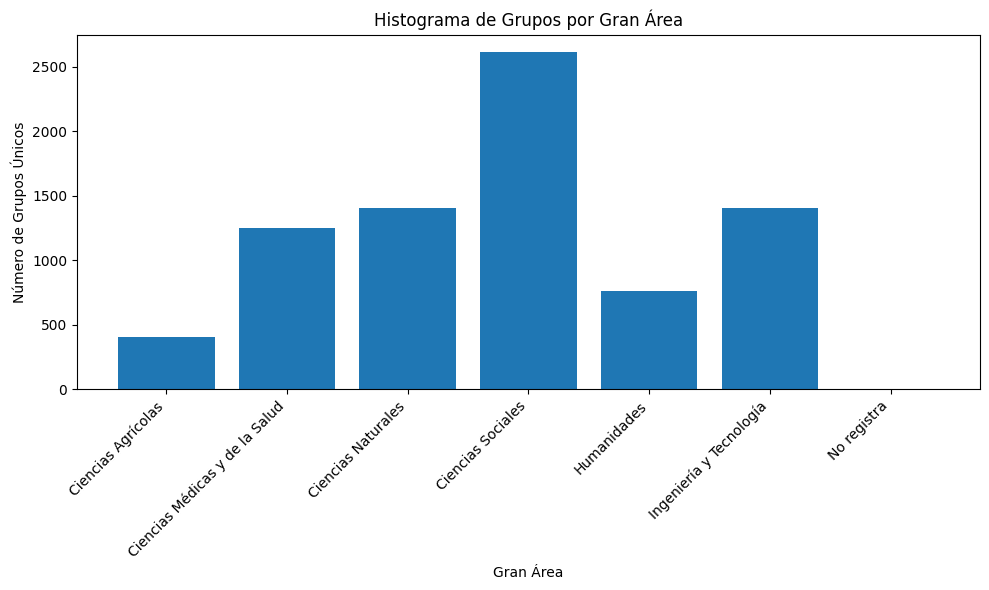

In [41]:
# Supongamos que tienes el DataFrame clasificacion_areas
# Asumiendo que clasificacion_areas tiene las columnas 'NME_GRAN_AREA_GR' y 'COD_GRUPO_GR'

# Crear un histograma
plt.figure(figsize=(10, 6))
plt.bar(clasificacion_areas['NME_GRAN_AREA_GR'], clasificacion_areas['COD_GRUPO_GR'])

# Personalizar el gráfico
plt.title('Histograma de Grupos por Gran Área')
plt.xlabel('Gran Área')
plt.ylabel('Número de Grupos Únicos')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()